In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# gbm

In [3]:
mean_100 = np.array([42, 83, 84, 84, 83, 84, 82, 86])
std_100 =  np.array([27, 13, 12, 13, 13, 12, 17, 11])

mean_transfer = np.array([1, 3, 2, 2, 2, 3, 2, 1])
std_transfer = np.array([-6, -6, -5, -7, -6, -6, -5, -3])

mean_transfer = mean_100 + mean_transfer
std_transfer = std_100 + std_transfer


mean_300 = np.array([44, 85, 85, 85, 82, 85, 83, 87])
std_300 =  np.array([28, 11, 11, 12, 13, 12, 16, 11])

y = np.array([1,2,3,4,5,6,7,8])*5

ylabel = ['1. Inter-modality\nregistration', '2. Resampling to \nimage size',
         '3. Atlas \nregistration', '4. Resampling to \nspacing', '4.a Bias field \ncorrection',
         '4.b Denoising', '4.c Histogram matching', '4.d Skull \nstripping']

In [4]:
def plot_err_bar(x, y, error, c, label):
    plt.scatter(x, y, c=c, s=20, label=label)
    for _x, _y, err in zip(x,y,error):
        plt.plot([_x-err/2, _x+err/2], [_y, _y], c=c, alpha=0.5)

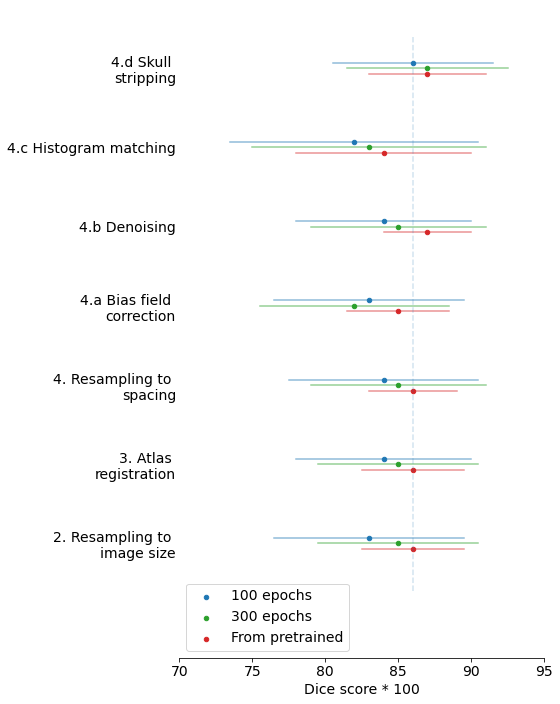

In [67]:
font = {'size'   : 14}
plt.rc('font', **font)


plt.figure(figsize=(8,10))
plot_err_bar(mean_100, y+0.35, std_100, c='tab:blue', label='100 epochs')
plot_err_bar(mean_300, y, std_300, c='tab:green', label='300 epochs')
plot_err_bar(mean_transfer, y-0.35, std_transfer, c='tab:red', label='From pretrained')
plt.yticks(ticks = y[1:], labels=ylabel[1:])
plt.xlim(70, 95)
plt.xlabel('Dice score * 100')
ax = plt.gca()
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis=u'y', which=u'both',length=0)
plt.plot([86, 86], [7,42], ls='--', alpha=0.2)

plt.legend(loc=3);
plt.tight_layout()

# plt.savefig('/home/anvar/error_bars.png')
# First, traning for 300 epochs until convergence is always better than training for 100 epochs.
# Second, training until convergence from pre-trained weights from a larger dataset is always beneficial,
# and result both in better mean Dice score and lower standard deviation.
# Third, experiment with skull stripping is the only one statistically significantly better than the baseline experiment 
# (Resampling to spacing 1x1x1 mm), though it benefits from pretraining less than any other setups.
# Finally, we observe that with training from a pretrained state the differences between the setup
# with and without skull stripping are washed away.

# BGPD

In [69]:
mean_100 = np.array([34, 70, 71, 71, 70, 70, 72, 75])
std_100 =  np.array([28, 19, 20, 19, 19, 19, 17, 16])

mean_transfer = np.array([2, 3, 2, 0, 2, 2, 2, -1])
std_transfer = np.array([-9, -8, -10, -9, -9, -9, -7, -7])

mean_transfer = mean_100 + mean_transfer
std_transfer = std_100 + std_transfer


mean_300 = np.array([35, 72, 74, 73, 74, 73, 74, 75])
std_300 =  np.array([29, 19, 17, 18, 18, 18, 17, 15])

y = np.array([1,2,3,4,5,6,7,8])*5

ylabel = ['1. Inter-modality\nregistration', '2. Resampling to \nimage size',
         '3. Atlas \nregistration', '4. Resampling to \nspacing', '4.a Bias field \ncorrection',
         '4.b Denoising', '4.c Histogram matching', '4.d Skull \nstripping']

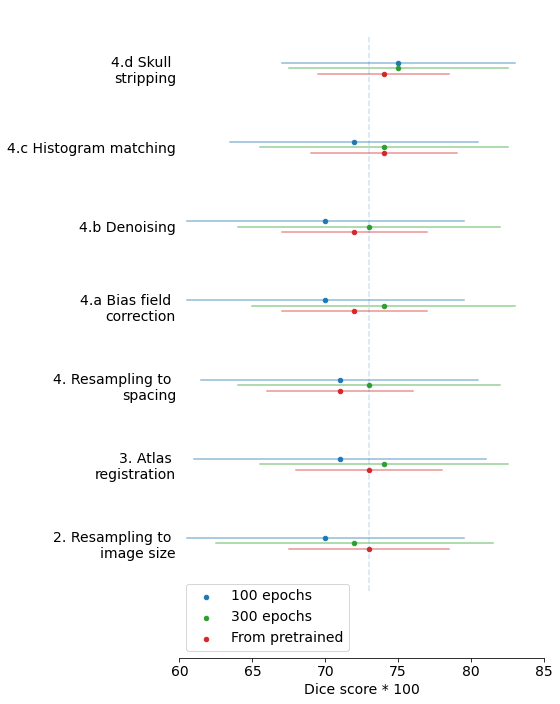

In [70]:
font = {'size'   : 14}
plt.rc('font', **font)


plt.figure(figsize=(8,10))
plot_err_bar(mean_100, y+0.35, std_100, c='tab:blue', label='100 epochs')
plot_err_bar(mean_300, y, std_300, c='tab:green', label='300 epochs')
plot_err_bar(mean_transfer, y-0.35, std_transfer, c='tab:red', label='From pretrained')
plt.yticks(ticks = y[1:], labels=ylabel[1:])
plt.xlim(60, 85)
plt.xlabel('Dice score * 100')
ax = plt.gca()
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis=u'y', which=u'both',length=0)
plt.plot([73, 73], [7,42], ls='--', alpha=0.2)

plt.legend(loc=3);
plt.tight_layout()

plt.savefig('/home/anvar/error_bars_bgpd.png')

# First, traning for 300 epochs until convergence is always better than training for 100 epochs.
# Second, training until convergence from pre-trained weights from a smaller dataset, while not necessarily
# result in better mean Dice score, always decreses prediction standard deviation.
# Third, experiment with skull stripping is the only one statistically significantly better than the baseline experiment 
# (Resampling to spacing 1x1x1 mm), though it benefits from pretraining less than any other setups.
# Finally, we observe that with training from a pretrained state the differences between the setup
# with and without skull stripping are washed away.